In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def lorentz(x, wL):
    # Lorentz with max=1 and w=FWHM: 
    gamma = wL
    return 1 / (1 + np.square(x/gamma)) 

In [3]:
def gauss(x, wG):
    # Gauss with max=1 and w=FWHM
    sigma = wG/np.sqrt(2*np.log(2))
    return np.exp(- x**2 / (2* sigma**2))

In [4]:
def voigt(x, wL, wG):
    gamma = wL
    sigma = wG/np.sqrt(2*np.log(2))
    z = (x + 1j*gamma)/np.sqrt(2)/sigma
    return np.sqrt(2*np.pi) * np.real(wofz(z))/np.sqrt(2*np.pi)/sigma
    # normolized Voigt (integral = 1): c * np.real(wofz((x + 1j*gamma)/(sigma * np.sqrt(2)))) / (sigma * np.sqrt(2*np.pi))
    # for Lorentz sigma=0, gamma=1, c=1
    # for Gauss sigma=1, gamma=0, c=1

In [5]:
def pseudo_voigt(x, w, n):
    # pseudo-voigt with max=1 and w=FWHM:
    return n * gauss(x, w) + (1-n) * lorentz(x,w)

In [6]:
def peak(x, x0, A, w, n):
    return A * pseudo_voigt(x-x0, w, n)

In [7]:
def width(theta, U, V, W):
    theta_rad = theta*np.pi/180
    return np.sqrt( U*np.tan(theta_rad/2)**2 + V*np.tan(theta_rad/2) + W)

In [8]:
x = np.linspace (0, 120 , 500)
y = np.zeros(500)

In [9]:
def intensity(theta_list, width):
    for n in range(9):
        print(n, xi[n], wi[n])
        y = y + peak(x, xi[n], 1, wi[n], 0.5)

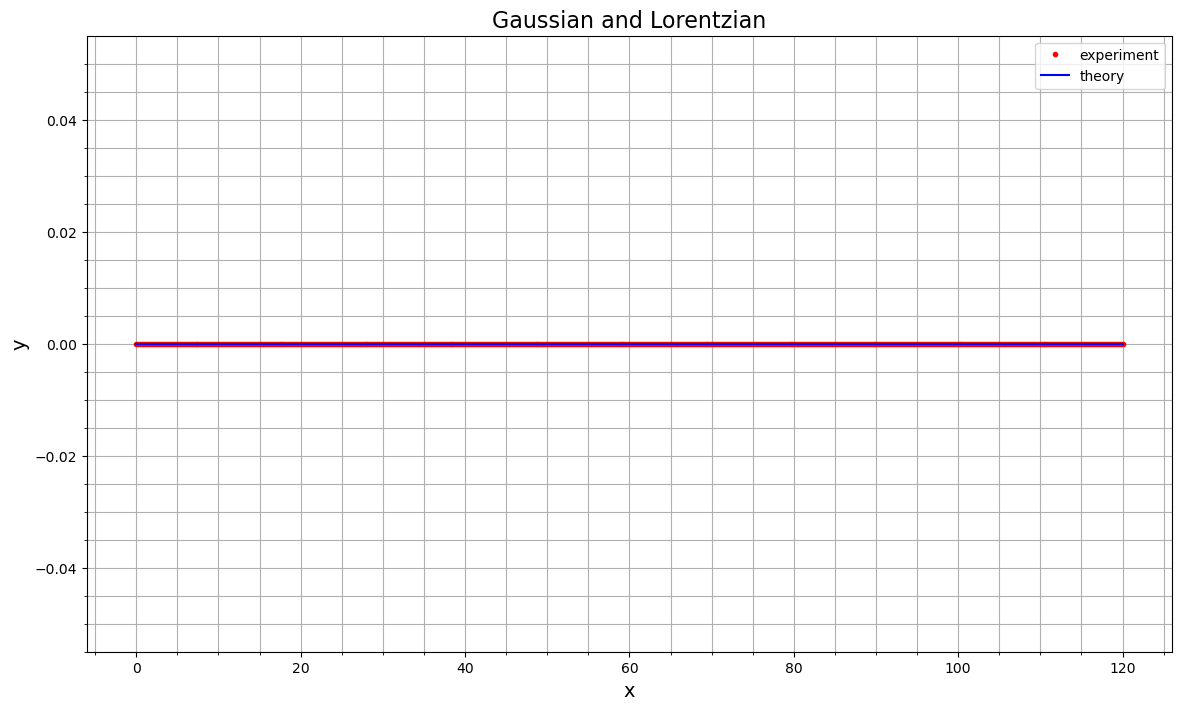

In [10]:
fig1, ax = plt.subplots(figsize=(14, 8))
ax.grid(visible=True, which='both', axis='both')
ax.minorticks_on()
ax.set_title("Gaussian and Lorentzian", fontsize=16)
ax.set_xlabel("x", fontsize=14)
#ax.set_xlim()
ax.set_ylabel("y", fontsize=14)
#ax.set_ylim()
ax.plot(x,y, '.r', label='experiment')
ax.plot(x,y, '-b', label='theory')
#ax.plot(x,yL, '-r', label='Lorentz')
#ax.plot(x,yG, '-b', label='Gauss')
#ax.plot(x,yPV, '-m', label='Pseudo Voigt')
#ax.plot(x,yV, '-g', label='Voigt')
ax.legend()

In [11]:
# In simple cubic lattince, all Miller indices are allowed
from itertools import combinations_with_replacement
sample_list = [0, 1, 2, 3]
SC_indices = list(combinations_with_replacement(sample_list, 3))
SC_indices.remove((0,0,0))
print(SC_indices)

[(0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 2, 2), (0, 2, 3), (0, 3, 3), (1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 2, 2), (1, 2, 3), (1, 3, 3), (2, 2, 2), (2, 2, 3), (2, 3, 3), (3, 3, 3)]


In [12]:
def find_d(indices_list, a):
    miller = np.array(indices_list)
    return a/np.sqrt(miller.T[0]**2 + miller.T[1]**2 + miller.T[2]**2)

In [13]:
d_SC = find_d(SC_indices, 1)
print(d_SC)

[1.         0.5        0.33333333 0.70710678 0.4472136  0.31622777
 0.35355339 0.2773501  0.23570226 0.57735027 0.40824829 0.30151134
 0.33333333 0.26726124 0.22941573 0.28867513 0.24253563 0.21320072
 0.19245009]


In [14]:
l = 0.3
theta_SC = 180/np.pi * np.arcsin(l/2/d_SC)
print(theta_SC)

[ 8.62692656 17.45760312 26.74368395 12.24732424 19.59748371 28.31649352
 25.10409025 32.74034176 39.5236079  15.05864737 21.55680297 29.83432382
 26.74368395 34.14219136 40.83136041 31.30644625 38.20418861 44.71351633
 51.20776365]


In [15]:
# In body centerd cubic lattice, only indices with h+k+l=even are allowed
BCC_indices = SC_indices[:]
for item in BCC_indices:
        if (item[0] + item[1] + item[2]) % 2 != 0:
            BCC_indices.remove(item)
print(BCC_indices)  

[(0, 0, 2), (0, 1, 1), (0, 1, 3), (0, 2, 2), (0, 3, 3), (1, 1, 2), (1, 2, 2), (1, 2, 3), (2, 2, 2), (2, 3, 3)]


In [16]:
d_BCC = find_d(BCC_indices, 1)
print(d_BCC)

[0.5        0.70710678 0.31622777 0.35355339 0.23570226 0.40824829
 0.33333333 0.26726124 0.28867513 0.21320072]


In [17]:
#In face centered cubic lattice, h,k,l must all be either odd or even
FCC_indices = SC_indices[:]
for item in FCC_indices:
        all = "mixed"
        if (item[0]%2 != 0) and (item[1]%2 != 0) and (item[2]%2 != 0):
            all = "all pair"
        if (item[0]%2 == 0) and (item[1]%2 == 0) and (item[2]%2 == 0):
            all = "all even"
        if all == "mixed":
            FCC_indices.remove(item)
print(FCC_indices)           

[(0, 0, 2), (0, 1, 1), (0, 1, 3), (0, 2, 2), (0, 3, 3), (1, 1, 1), (1, 1, 3), (1, 2, 3), (1, 3, 3), (2, 2, 2), (2, 3, 3), (3, 3, 3)]


In [18]:
d_FCC = find_d(FCC_indices, 1)
print(d_FCC)

[0.5        0.70710678 0.31622777 0.35355339 0.23570226 0.57735027
 0.30151134 0.26726124 0.22941573 0.28867513 0.21320072 0.19245009]
